In [1]:
import pandas as pd
import numpy as np
import datetime


In [2]:
dane = pd.read_csv('Data/df_enriched.csv')
pd.options.display.max_columns=75
dane.sort_values(by='data_zdarzenia', ascending=False)

,Unnamed: 0,data_zdarzenia,godzina,GPS_x,GPS_y,miejscowosc,ulica,numer_domu,numer_drogi,pikietaz,obszar,skrzyzowanie,geometria_drogi,charakterystyka_miejsca,oswietlenie,rodzaj_zdarzenia,wina,rodzaj_drogi,nawierzchnia_twarda,stan_nawierzchni,sygnalizacja,oznakowanie_poziome,liczba_pasow,zachowanie_kierujacego,zachowanie_pieszego,inne_przyczyny,liczba_rannych,liczba_zabitych,liczba_kolizji,liczba_wypadkow,rok,miesiac,dzien_miesiąca,dzien_tygodnia,data,czy_weekend,handlowa,...,pogoda_dobre_warunki,pogoda_pochmurno,pogoda_mgla,pogoda_dym,pogoda_oslep_slonce,pogoda_opady,pogoda_snieg,pogoda_grad,pogoda_deszcz,pogoda_wiatr,nawierzchnia_sucha,nawierzchnia_mokra,nawierzchnia_oblodzona,nawierzchnia_zasniezona,nawierzchnia_nierowna,nawierzchnia_kaluze,nawierzchnia_zanieszyszczenia,zachowanie_kierujacego_niepr_cofanie,zachowanie_kierujacego_niepr_omijanie,zachowanie_kierujacego_niedost_predkosci,zachowanie_kierujacego_nieudzielenie_pierw,zachowanie_kierujacego_niepr_skrecanie,zachowanie_kierujacego_niezachowanie_odl,zachowanie_kierujacego_niepr_zmiana_pasa,zachowanie_kierujacego_zmeczenie,zachowanie_kierujacego_niepr_wymijanie,zachowanie_kierujacego_nieprzestrz_znakow,zachowanie_kierujacego_niestos_do_sygn,zachowanie_kierujacego_nieust_przejazdu,zachowanie_kierujacego_nieust_pieszemu,zachowanie_kierujacego_gwalt_hamowanie,zachowanie_kierujacego_niepr_wyprzedzanie,zachowanie_kierujacego_niepr_zatrzymanie,zachowanie_kierujacego_niepr_zawracanie,zachowanie_kierujacego_niepr_przejazd_rowerowy,zachowanie_kierujacego_jazda_bez_swiatel,zachowanie_kierujacego_inne_przyczyny
229643,229643,2019-12-31,13,19.107833,50.845194,CZĘSTOCHOWA,KISIELEWSKIEGO,NaN,483,NaN,1.0,Z drogą z pierwsz.,NaN,jezdnia,Dzień,Zderzenie pojazdów boczne,z winy kierującego,jednojezdniowa dwukierunkowa,NaN,sucha,0,0.0,2.0,nieustąpienie pierwszeństwa przejazdu,NaN,NaN,0,0,1,0,2019,12,31,1,2019-12-31,0,2,...,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
229773,229773,2019-12-31,13,18.299861,50.201972,KUŹNIA RACIBORSKA,SŁOWACKIEGO,NaN,P3534S,NaN,1.0,Z drogą z pierwsz.,NaN,jezdnia,Dzień,Najechanie na słup znak,z winy kierującego,jednojezdniowa dwukierunkowa,NaN,sucha,0,0.0,2.0,nieprawidłowe zawracanie,NaN,NaN,0,0,1,0,2019,12,31,1,2019-12-31,0,2,...,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
229784,229784,2019-12-31,16,18.523667,50.116667,RYBNIK,ENERGETYKÓW,NaN,P7028S,NaN,1.0,Z drogą z pierwsz.,NaN,pobocze,"Świt, zmrok",Najechanie na słup znak,z winy kierującego,jednojezdniowa dwukierunkowa,NaN,sucha,0,0.0,2.0,inne przyczyny,NaN,NaN,0,0,1,0,2019,12,31,1,2019-12-31,0,2,...,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
229783,229783,2019-12-31,23,18.731389,50.137250,ORZESZE,MARII KONOPNICKIEJ,14,G520313S,NaN,1.0,NaN,odcinek prosty,pobocze,Noc - droga oświetlona,Inne,z winy kierującego,jednojezdniowa dwukierunkowa,NaN,sucha,0,1.0,2.0,nieprawidłowe cofanie,NaN,NaN,0,0,1,0,2019,12,31,1,2019-12-31,0,2,...,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
229782,229782,2019-12-31,21,19.435139,50.482333,ZAWIERCIE,IGNACEGO PADEREWSKIEGO,NaN,78,120.7,1.0,NaN,odcinek prosty,jezdnia,Noc - droga nieoświetlona,Najechanie na pieszego,z winy pieszego,jednojezdniowa dwukierunkowa,NaN,mokra,0,0.0,3.0,NaN,nieostrożne wejście na jezdnię przed jadącym p...,NaN,0,0,1,0,2019,12,31,1,2019-12-31,0,2,...,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,96,2016-01-01,1,19.184444,49.851500,BUJAKÓW,BIELSKA,31,52,16.6,0.0,NaN,odcinek prosty,jezdnia,Noc - droga nieoświetlona,Najechanie na zwierzę,z innych przyczyn,jednojezdniowa dwukierunkowa,NaN,sucha,0,0.0,NaN,NaN,NaN,"Obiek

In [3]:
dane.columns


Index(['Unnamed: 0', 'data_zdarzenia', 'godzina', 'GPS_x', 'GPS_y',
       'miejscowosc', 'ulica', 'numer_domu', 'numer_drogi', 'pikietaz',
       'obszar', 'skrzyzowanie', 'geometria_drogi', 'charakterystyka_miejsca',
       'oswietlenie', 'rodzaj_zdarzenia', 'wina', 'rodzaj_drogi',
       'nawierzchnia_twarda', 'stan_nawierzchni', 'sygnalizacja',
       'oznakowanie_poziome', 'liczba_pasow', 'zachowanie_kierujacego',
       'zachowanie_pieszego', 'inne_przyczyny', 'liczba_rannych',
       'liczba_zabitych', 'liczba_kolizji', 'liczba_wypadkow', 'rok',
       'miesiac', 'dzien_miesiąca', 'dzien_tygodnia', 'data', 'czy_weekend',
       'handlowa', 'Skrzyżowanie', 'warunki_atmosferyczne',
       'pogoda_dobre_warunki', 'pogoda_pochmurno', 'pogoda_mgla', 'pogoda_dym',
       'pogoda_oslep_slonce', 'pogoda_opady', 'pogoda_snieg', 'pogoda_grad',
       'pogoda_deszcz', 'pogoda_wiatr', 'nawierzchnia_sucha',
       'nawierzchnia_mokra', 'nawierzchnia_oblodzona',
       'nawierzchnia_zasniezon

In [4]:
#miejscowosc o największej liczbie wypadków

dane.groupby('miejscowosc').agg({'liczba_wypadkow':'sum'}).sort_values(by='liczba_wypadkow', ascending=False).head(1)

,liczba_wypadkow
miejscowosc,
CZĘSTOCHOWA,1450


In [5]:
#miejscowosc o największej liczbie kolizji

dane.groupby('miejscowosc').agg({'liczba_kolizji':'sum'}).sort_values(by='liczba_kolizji', ascending=False).head(1)

,liczba_kolizji
miejscowosc,
KATOWICE,25841


<h1 span style="color:blue">Liczba wypadków przypadająca na 1000 mieszkańców

In [6]:
ludnosc = pd.read_excel('ludnosc2019.xls', sheet_name='Tablica 7', usecols=['Unnamed: 0','Unnamed: 2'])

In [7]:
ludnosc.columns

Index(['Unnamed: 0', 'Unnamed: 2'], dtype='object')

In [8]:
ludnosc.rename(columns={'Unnamed: 0':'miasta', 'Unnamed: 2':'liczba_ludnosci'}, inplace=True)

In [9]:
ludnosc.dropna(how='any')

,miasta,liczba_ludnosci
5,WOJEWÓDZTWA VOIVODSHIPS MIASTA ...,2018
8,Dolnośląskie,1990503
9,Wrocław,640648
10,Wrocław - Fabryczna,207032
11,Wrocław - Krzyki,177337
...,...,...
982,Tychowo,2517
983,Wałcz,25359
984,Węgorzyno,2831
985,Wolin,4828


In [10]:
ludnosc['miasta']=ludnosc['miasta'].str.upper()

In [11]:
dane['ludnosc'] = ludnosc['miasta'].apply(lambda x: ludnosc['liczba_ludnosci'] if x in dane['miejscowosc'] else 0)
#czemu to nie działa???
ludnosc['miasta']

0                TABL. 7. LUDNOŚĆ W MIASTACH 2017 I 2018
1                                 STAN W DNIU 31 GRUDNIA
2                      URBAN POPULATION IN 2017 AND 2018
3                                    AS OF 31ST DECEMBER
4                                                    NaN
                             ...                        
986                                           ZŁOCIENIEC
987                                                  NaN
988    A  Z DNIEM 1 I 2018 R. MIEJSCOWOŚĆ OTRZYMAŁA P...
989                                                  NaN
990    A  ON 1ST JANUARY 2018 RURAL MUNICIPALITY BECO...
Name: miasta, Length: 991, dtype: object

In [12]:
'''def counter(ludnosc):
    for x in ludnosc['miasta']:
        if (x is dane['miejscowosc']):
            (dane['ludnosc'] == ludnosc['liczba_ludnosci'])
        else:
            return 0
    return dane['ludnosc']
            
    '''

"def counter(ludnosc):\n    for x in ludnosc['miasta']:\n        if (x is dane['miejscowosc']):\n            (dane['ludnosc'] == ludnosc['liczba_ludnosci'])\n        else:\n            return 0\n    return dane['ludnosc']\n            \n    "

In [13]:
ludnosc.columns

Index(['miasta', 'liczba_ludnosci'], dtype='object')

In [14]:
#dane['ludnosc'] = ludnosc.apply(counter, axis=1)
dane['ludnosc'].unique()

array([ 0., nan])

In [15]:
dane['ludnosc']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
229924    NaN
229925    NaN
229926    NaN
229927    NaN
229928    NaN
Name: ludnosc, Length: 229929, dtype: float64

In [16]:
ludnosc.head(10)

,miasta,liczba_ludnosci
0,TABL. 7. LUDNOŚĆ W MIASTACH 2017 I 2018,NaN
1,STAN W DNIU 31 GRUDNIA,NaN
2,URBAN POPULATION IN 2017 AND 2018,NaN
3,AS OF 31ST DECEMBER,NaN
4,NaN,NaN
5,WOJEWÓDZTWA VOIVODSHIPS MIASTA ...,2018
6,NaN,ogółem total
7,NaN,NaN
8,DOLNOŚLĄSKIE,1990503
9,WROCŁAW,640648


In [17]:
dane['ludnosc']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
229924    NaN
229925    NaN
229926    NaN
229927    NaN
229928    NaN
Name: ludnosc, Length: 229929, dtype: float64

<h1 span style="color:blue">Rozkład wypadków w czasie (dzień, mc, dzień tygodnia, niedziela hadlowa, weekend)

In [18]:
#Liczba wypadków wg roku

dane.groupby(['rok']).agg({'liczba_wypadkow':'sum'}).sort_values(by='liczba_wypadkow', ascending=False) 

,liczba_wypadkow
rok,
2016,3678
2017,3519
2018,3237
2019,2964


<span style="color:blue">Zauważalna tendencja spadkowa liczby wypadków w latach 2016-2019

In [19]:
#Liczba wypadków wg miesiąca

dane.groupby(['miesiac']).agg({'liczba_wypadkow':'sum'}).sort_values(by='liczba_wypadkow', ascending=False).head()

,liczba_wypadkow
miesiac,
10,1301
9,1287
6,1274
7,1248
8,1240


In [20]:
(dane
     .groupby(['miesiac','obszar'])
     .agg({'liczba_wypadkow':'sum'})
     .sort_values(by='liczba_wypadkow', ascending=False))

#1-zabudowany
#0-niezabudowany

,,liczba_wypadkow
miesiac,obszar,
10,1.0,1048
6,1.0,1040
9,1.0,1010
8,1.0,992
7,1.0,977
12,1.0,974
5,1.0,922
4,1.0,892
11,1.0,886


<span style="color:blue">Wnioski: Liczba wypadków jest największa w miesiącach od czerwca do października w obszarze zabudowanym.
    

In [21]:
#Liczba wypadków wg. daty

dane.groupby(['data']).agg({'liczba_wypadkow':'sum'}).sort_values(by='liczba_wypadkow', ascending=False).head()

,liczba_wypadkow
data,
2016-06-07,26
2018-04-20,25
2016-10-03,25
2016-01-12,25
2017-07-30,23


In [22]:
#liczba wypadków wg dnia miesiąca

dzien_mies = (dane
    .groupby(['dzien_miesiąca'])
    .agg({'liczba_wypadkow':'sum'})
    .sort_values(by='liczba_wypadkow'))

print(f"Dni miesiąca z najmniejszą liczbą wypadków: {dzien_mies['liczba_wypadkow'].nsmallest(5)}")
print(f"Dni miesiąca z największą liczbą wypadków: {dzien_mies['liczba_wypadkow'].nlargest(5)}")
dzien_mies.head(10)

Dni miesiąca z najmniejszą liczbą wypadków: dzien_miesiąca
31    264
24    387
18    400
30    403
1     405
Name: liczba_wypadkow, dtype: int64
Dni miesiąca z największą liczbą wypadków: dzien_miesiąca
12    477
13    474
7     467
5     464
11    464
Name: liczba_wypadkow, dtype: int64


,liczba_wypadkow
dzien_miesiąca,
31,264
24,387
18,400
30,403
1,405
26,415
27,416
10,417
17,421


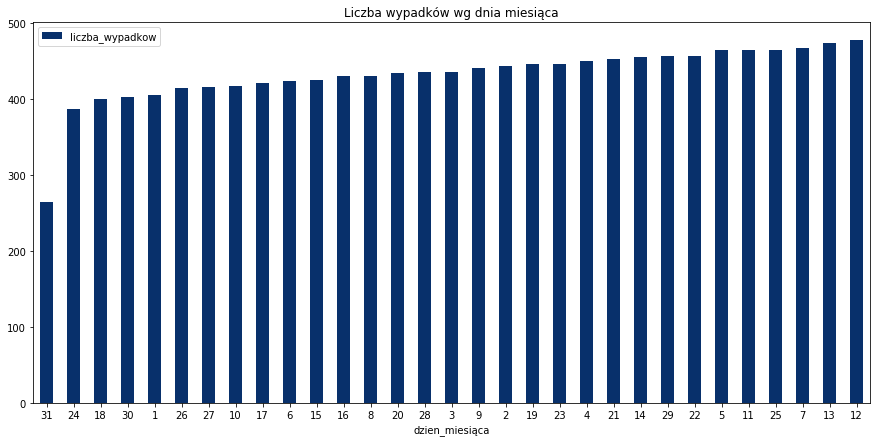

In [23]:
#zróbmy prosty wykres

import matplotlib.pyplot as plt


dzien_mies['liczba_wypadkow'].plot(kind = 'bar', figsize = (15,7),rot=360, title = 'Liczba wypadków wg dnia miesiąca', legend = True, colormap = 'Blues_r');

<span style="color:blue"> Wnioski: Najmniejsza liczba wypadków przyada na 31 dzień miesiąca, największa na 12-13 dzień
    

In [24]:
#Liczba wypadków wg. dnia tygodnia

dane.groupby(['dzien_tygodnia']).agg({'liczba_wypadkow':'sum'}).sort_values(by='liczba_wypadkow', ascending=False).head(7)

,liczba_wypadkow
dzien_tygodnia,
4,2201
0,2108
3,2030
1,1947
2,1913
5,1734
6,1465


<span style="color:blue">Najmniej wypadków ma miejsce w niedzielę, zdecydowanie jest więcej wypadków w dni pracujące vs sobota i niedziela -> wypadki a dojazd do pracy

In [25]:
niedz_handl = dane[(dane['rok'] == 2018) | (dane['rok'] == 2019)] #częściowy zakaz handlu w niedziele zaczął obowiązywać od 2018 roku

print(niedz_handl.groupby(['data'])['handlowa'].unique().value_counts().sort_index())

niedz_handl.groupby(['handlowa']).agg({'liczba_wypadkow':'sum'})


#niedziela niehandlowa 0
#niedziela handlowa 1
#pozostałe dni 2

[0]     68
[1]     36
[2]    626
Name: handlowa, dtype: int64


,liczba_wypadkow
handlowa,
0,426
1,250
2,5525


In [26]:
#średnia liczba wypadków

nh = 426//68 #niehandlowa
h = 250//36 #handlowa
p = 5525//626 #pozostałe

print(f'Liczba wypadków w niedzielę niehandlową: {nh}, handlową: {h}, pozostałe dni: {p}')

Liczba wypadków w niedzielę niehandlową: 6, handlową: 6, pozostałe dni: 8


In [27]:
dane.groupby(['czy_weekend']).agg({'liczba_wypadkow':'sum'})

,liczba_wypadkow
czy_weekend,
0,10199
1,3199


In [28]:
#Średnia liczba wypdków weekend vs pozostałe dni tygodnia

print(dane.groupby(['data'])['czy_weekend'].unique().value_counts().sort_index())

sr_weekend = 3199//418
sr_tydzien = 10199//1043

print(f'Średnia liczba wypadków: w weekend {sr_weekend}, pozostałe dni tygodnia {sr_tydzien}')

[0]    1043
[1]     418
Name: czy_weekend, dtype: int64
Średnia liczba wypadków: w weekend 7, pozostałe dni tygodnia 9


<h1 span style="color:blue">Korelacja wypadków z fazą księżyca :-) ... plik z pogodą

<h1 span style="color:blue">W jakich miejscach jest najwięcej wypadków

In [29]:
(dane
     .groupby(['geometria_drogi'])
     .agg({'liczba_wypadkow':'sum'})
     .sort_values(by='liczba_wypadkow', ascending=False))

,liczba_wypadkow
geometria_drogi,
odcinek prosty,7121
zakręt łuk,1100
spadek,101
wzniesienie,77
odcinek prosty spadek,34
odcinek prosty wzniesienie,29
zakręt łuk spadek,19
zakręt łuk wzniesienie,6
wierzchołek wzn,2


In [30]:
#zastanawiające...najwięcej wypadków na prostej drodze

In [31]:
#możemy sprawdzić jakie były przyczyny wypadków na prostym odcinku drogi

prosta_droga = dane[dane['geometria_drogi']=='odcinek prosty']
(prosta_droga
         .groupby(['zachowanie_kierujacego'])
         .agg({'liczba_wypadkow':'sum'})
         .sort_values(by='liczba_wypadkow', ascending=False)
         .head(30))

,liczba_wypadkow
zachowanie_kierujacego,
niedostosowanie prędkości do warunków ruchu,952
nieustąpienie pierwszeństwa pieszemu na przejściu dla pieszych,943
niezachowanie bezp odleg między pojazdami,831
nieustąpienie pierwszeństwa przejazdu,640
inne przyczyny,410
nieprawidłowe wyprzedzanie,287
nieprawidłowe zmienianie pasa ruchu,239
nieprawidłowe cofanie,181
nieprawidłowe skręcanie,178


In [32]:
(prosta_droga
     .groupby(['rodzaj_zdarzenia'])
     .agg({'liczba_wypadkow':'sum'})
     .sort_values(by='liczba_wypadkow', ascending=False)
     .head(14))

,liczba_wypadkow
rodzaj_zdarzenia,
Najechanie na pieszego,2592
Zderzenie pojazdów boczne,1311
Zderzenie pojazdów tylne,1287
Zderzenie pojazdów czołowe,465
Wywrócenie się pojazdu,386
Inne,374
Najechanie na drzewo,228
Zdarzenie z pasażerem,135
Najechanie na słup znak,110


In [33]:
(prosta_droga
    .groupby(['godzina'])
    .agg({'liczba_wypadkow':'sum'})
    .sort_values(by='liczba_wypadkow', ascending=False).head())

,liczba_wypadkow
godzina,
16,601
17,594
15,568
14,568
18,476


In [34]:
(prosta_droga
    .groupby(['miesiac'])
    .agg({'liczba_wypadkow':'sum'})
    .sort_values(by='liczba_wypadkow', ascending=False).head(12))

,liczba_wypadkow
miesiac,
9,679
10,678
8,668
12,656
7,647
6,643
5,613
11,579
4,565


In [35]:
(prosta_droga
    .groupby(['miejscowosc'])
    .agg({'liczba_wypadkow':'sum'})
    .sort_values(by='liczba_wypadkow', ascending=False).head())

,liczba_wypadkow
miejscowosc,
KATOWICE,614
CZĘSTOCHOWA,596
SOSNOWIEC,388
ZABRZE,346
GLIWICE,252


In [36]:
(prosta_droga
    .groupby(['obszar'])
    .agg({'liczba_wypadkow':'sum'})
    .sort_values(by='liczba_wypadkow', ascending=False))

#1-obszar zabudowany
#0 -obszar niezabudowany

,liczba_wypadkow
obszar,
1.0,5622
0.0,1499


In [37]:
(prosta_droga
    .groupby(['charakterystyka_miejsca'])
    .agg({'liczba_wypadkow':'sum'})
    .sort_values(by='liczba_wypadkow', ascending=False).head())

,liczba_wypadkow
charakterystyka_miejsca,
jezdnia,4850
przejście dla pieszych,1331
chodnik droga dla pieszych,242
pobocze,153
przystanek komunikacji publicznej,82


In [38]:
(prosta_droga
    .groupby(['oswietlenie'])
    .agg({'liczba_wypadkow':'sum'})
    .sort_values(by='liczba_wypadkow', ascending=False).head())

,liczba_wypadkow
oswietlenie,
Dzień,4856
Noc - droga oświetlona,1383
"Świt, zmrok",486
Noc - droga nieoświetlona,396


In [39]:
(prosta_droga
    .groupby(['ulica'])
    .agg({'liczba_wypadkow':'sum'})
    .sort_values(by='liczba_wypadkow', ascending=False).head(
    ))

,liczba_wypadkow
ulica,
KATOWICKA,145
1 MAJA,106
JÓZEFA PIŁSUDSKIEGO,100
WOLNOŚCI,95
CZĘSTOCHOWSKA,93


In [40]:
(prosta_droga
    .groupby(['rodzaj_drogi'])
    .agg({'liczba_wypadkow':'sum'})
    .sort_values(by='liczba_wypadkow', ascending=False)
    .head())

,liczba_wypadkow
rodzaj_drogi,
jednojezdniowa dwukierunkowa,5459
dwie jezdnie jednokierunkowe,1018
jednokierunkowa,337
autostrada,168
ekspresowa,139


In [41]:
(prosta_droga
    .groupby(['stan_nawierzchni'])
    .agg({'liczba_wypadkow':'sum'})
    .sort_values(by='liczba_wypadkow', ascending=False)
    .head())

,liczba_wypadkow
stan_nawierzchni,
sucha,4841
mokra,1982
oblodzenie zaśnieżenie,174
oblodzona zaśnieżona,37
kałuże rozlewiska,16


In [42]:
(prosta_droga
    .groupby(['sygnalizacja'])
    .agg({'liczba_wypadkow':'sum'})
    .sort_values(by='liczba_wypadkow', ascending=False))

,liczba_wypadkow
sygnalizacja,
0,6795
1,308
-1,18


In [43]:
prosta_droga['liczba_kolizji'].sum()
    

135582

In [44]:
(prosta_droga
    .groupby(['czy_weekend'])
    .agg({'liczba_wypadkow':'sum'})
    .sort_values(by='liczba_wypadkow', ascending=False))

,liczba_wypadkow
czy_weekend,
0,5408
1,1713


In [45]:
print('Ranni:',prosta_droga['liczba_rannych'].sum())
print('Zabici:',prosta_droga['liczba_zabitych'].sum())

Ranni: 8208
Zabici: 580


<span style="color:blue">Wnioski dot. wypadków na prostym odcinku drogi
    
<span style="color:blue">    - najwięcej wypadków miało miejsce na prostym odcinku drogi
    
<span style="color:blue">    - wśród tych wypadków jako główne przyczyny podawano:
    
 <span style="color:blue">       - niedostosowanie prędkości do warunków ruchu
     
<span style="color:blue">        - nieustąpienie pierwszeństwa pieszemu na pasach
    
<span style="color:blue">        - nie zachowanie bezpiecznej odległości między pojazdami
    
<span style="color:blue">    - jako rodzaj zdarzenia najczęsciej występowało najechanie na pieszego oraz zderzenie aut (czołowe, boczne, tylne)
    
<span style="color:blue">- najwięcej zdarzeń na prostym odcinku drogi miało miesce w godzinach między 14 a 17
    
<span style="color:blue">- zdecydowana większość wypadków miała miejsce na drodze jezdnojezdniowej dwukierunkowej w obszarze zabudowanym w ciągu dnia


In [46]:
(dane
    .groupby(['godzina'])
    .agg({'liczba_wypadkow':'sum'})
    .sort_values(by='liczba_wypadkow', ascending=False))

,liczba_wypadkow
godzina,
16,1088
15,1086
17,1080
14,1080
13,894
18,887
11,796
12,737
10,701


<span style = "color:blue"> Podobnie jak w przypadku wypadków na prostym odcinku najwięcej wypadków ma miejsce w godzinach szczytu czyli między 14 a 17 - powroty do domu z pracy, szkoły itp 

In [47]:
#obszar a liczba wypadków

(dane
    .groupby(['obszar'])
    .agg({'liczba_wypadkow':'sum'})
    .sort_values(by='liczba_wypadkow', ascending=False))
#1-zabudowany
#0-niezabudowany

,liczba_wypadkow
obszar,
1.0,10794
0.0,2604


In [48]:
#powody wypadków a dzień i godzina

(dane
    .groupby(['rodzaj_zdarzenia', 'godzina','dzien_tygodnia'])
    .agg({'liczba_wypadkow':'sum'})
    .sort_values(by='liczba_wypadkow', ascending=False).head(20))

liczba_wypadkow
rodzaj_zdarzenia          godzina dzien_tygodnia                 
Zderzenie pojazdów boczne 15      3                            71
Najechanie na pieszego    17      2                            71
Zderzenie pojazdów boczne 15      0                            70
Najechanie na pieszego    17      0                            67
Zderzenie pojazdów boczne 13      4                            64
                          14      4                            64
Najechanie na pieszego    17      3                            64
                          18      4                            63
Zderzenie pojazdów boczne 13      0                            60
                          14      0                            60
Najechanie na pieszego    16      3                            59
                                  1                            59
Zderzenie pojazdów boczne 17      4                            58
                          16      4                            57
                          14      3                            57
                          16      1                            56
                                  2                            56
                          15      2                            55
Najechanie na pieszego    18      1                            55
                          17      1                            55

In [49]:
#warunki pogodowe vs wypadki

(dane
     .groupby(['warunki_atmosferyczne'])
     .agg({'liczba_wypadkow':'sum'})
    .sort_values(by='liczba_wypadkow', ascending=False))

,liczba_wypadkow
warunki_atmosferyczne,
dobre warunki atmosferyczne,8266
pochmurno,2552
opady deszczu,1464
pochmurno opady deszczu,363
oślepiające słońce,307
opady śniegu gradu,257
mgła dym,58
silny wiatr,41
pochmurno opady śniegu gradu,29


In [50]:
#zmiana czasu

#można przypuszczać, że nie odnotowano zwiększonej liczby wypadków z powodu zmiany czasu ponieważ zmiana czasu 
#z letniego na zimowy i odwrotnie następuje w weekend z soboty na niedzielę
#a jak wiemy z wcześniejszych obliczeń w weekend liczba wypadków jest zdecydowanie mniejsza niż w ciągu tygodnia
#należałoby porównać liczbę wypadków przypadającą tylko na sobotę i niedzielę lub tylko na niedzielę 
#(zmiana czasu następuje z 2 na 3 w niedzielę) 

zmiana_czasu = [datetime.date(2016,3,27),
               datetime.date(2016,10,30),
               datetime.date(2017,3,26),
               datetime.date(2017,10,29),
              datetime.date(2018,3,25),
              datetime.date(2018,10,28),
              datetime.date(2019,3,31),
              datetime.date(2019,10,27)]  

def change_time(dane):
    if (pd.to_datetime(dane['data']) in zmiana_czasu):
        return 1
    else:
        return 0
    
dane['zmiana'] = dane.apply(change_time, axis=1)

In [51]:
dane.groupby(['zmiana']).agg({'liczba_wypadkow':'sum'})

,liczba_wypadkow
zmiana,
0,13354
1,44


In [52]:
#średnia liczba wypadków przypadająca na niedzielę ze zmianą czasu

44//8 #dzielę liczbę wypadków jaka ma miejsce w niedzielę ze zmianą czasu przez liczbę niedziel

5

In [53]:
#odnieść powyższy wynik do średniej dobowej liczby wypadków

dane['liczba_wypadkow'].sum()//dane[dane['liczba_wypadkow'] == 1]['data'].nunique()   #liczba wypadków podzielona przez liczbę dni, w których miał miejscy chcociaż jeden wypadek 
                                                                                     #liczba wypadków unique: 1 i 0

9

In [54]:
#średnia liczba wypadków przypadająca na niedzielę

(dane
     .groupby(['dzien_tygodnia'])
     .agg({'liczba_wypadkow':'sum'}))

,liczba_wypadkow
dzien_tygodnia,
0,2108
1,1947
2,1913
3,2030
4,2201
5,1734
6,1465


In [55]:
print(dane.groupby(['data'])['dzien_tygodnia'].unique().value_counts().sort_index())

[0]    209
[1]    209
[2]    208
[3]    208
[4]    209
[5]    209
[6]    209
Name: dzien_tygodnia, dtype: int64


In [56]:
#średnia liczba wypadków przyapdająca na niedzieelę
1465//209

7

In [57]:
#Średnia liczba wypadków mających miejsce w niedzielę 'ze zmianą czasu' jest niższa(5) od średniej liczby wypadków w niedziele(7)

<h1 span style="color:blue">POWODY WYPADKÓW A DZIEŃ I GODZINA

In [58]:
#powody wypadków

(dane
     .groupby(['zachowanie_kierujacego'])
     .agg({'liczba_wypadkow':'sum'})
     .sort_values(by='liczba_wypadkow', ascending=False)
     .head())

,liczba_wypadkow
zachowanie_kierujacego,
nieustąpienie pierwszeństwa przejazdu,3041
niedostosowanie prędkości do warunków ruchu,1926
nieustąpienie pierwszeństwa pieszemu na przejściu dla pieszych,1389
niezachowanie bezp odleg między pojazdami,1198
inne przyczyny,582


In [59]:
(dane
     .groupby(['zachowanie_pieszego'])
     .agg({'liczba_wypadkow':'sum'})
     .sort_values(by='liczba_wypadkow', ascending=False)
     .head())

,liczba_wypadkow
zachowanie_pieszego,
nieostrożne wejście na jezdnię przed jadącym pojazdem,604
nieostrożne wejście na jezdnię zza pojazdu przeszkody,179
przekraczanie jezdni w miejscu niedozwolonym,146
wejście na jezdnię przy czerwonym świetle,82
inne przyczyny,72


In [60]:
(dane
     .groupby(['inne_przyczyny'])
     .agg({'liczba_wypadkow':'sum'})
     .sort_values(by='liczba_wypadkow', ascending=False)
     .head(10))

,liczba_wypadkow
inne_przyczyny,
Nieustalone,351
"Obiekty, zwierzęta na drodze",95
Inne,62
Z winy pasażera,50
"Utrata przytomności, śmierć kierującego",36
Stan jezdni,27
Oślepienie przez inny pojazd lub słońce,14
Niesprawność techniczna pojazdu,12
"Utrata przytomności, śmierć kierującego (od 11.2015)",6


In [61]:
(dane
     .groupby(['wina'])
     .agg({'liczba_wypadkow':'sum'})
     .sort_values(by='liczba_wypadkow', ascending=False)
     .head(10))

,liczba_wypadkow
wina,
z winy kierującego,11483
z winy pieszego,1095
z innych przyczyn,645
współwina uczestników ruchu,175


<span style="color:blue">Wnioski: 
    
<span style="color:blue">Najczęstsza przyczyna wypadków to:
    
<span style="color:blue">- nieustąpienie pierwszeństwa przejazdu	(3041) - zachowanie kierującego
    
<span style="color:blue">- nieostrożne wejście na jezdnię przed jadącym pojazdem	(604) -zachowanie pieszego

In [62]:
#wypadki a dzień tygodnia

(dane
     .groupby(['zachowanie_kierujacego','dzien_tygodnia'])
     .agg({'liczba_wypadkow':'sum'})
     .sort_values(by='liczba_wypadkow', ascending=False)
     .head(20))

liczba_wypadkow
zachowanie_kierujacego                             dzien_tygodnia                 
nieustąpienie pierwszeństwa przejazdu              4                           536
                                                   0                           499
                                                   3                           469
                                                   2                           435
                                                   1                           431
                                                   5                           379
niedostosowanie prędkości do warunków ruchu        6                           371
                                                   5                           293
nieustąpienie pierwszeństwa przejazdu              6                           292
niedostosowanie prędkości do warunków ruchu        4                           278
                                                   0                           256
nieustąpienie pierwszeństwa pieszemu na przejśc... 2                           250
niedostosowanie prędkości do warunków ruchu        2                           247
                                                   3                           242
                                                   1                           239
nieustąpienie pierwszeństwa pieszemu na przejśc... 0                           230
                                                   3                           228
                                                   1                           226
niezachowanie bezp odleg między pojazdami          4                           220
nieustąpienie pierwszeństwa pieszemu na przejśc... 4                           220

In [63]:
 przyczyna = (dane
    .groupby(['zachowanie_kierujacego','dzien_tygodnia'])
    .agg({'liczba_wypadkow':'sum'}).sort_values(by='liczba_wypadkow', ascending=False))

przyczyna.reset_index(inplace=True)
przyczyna[przyczyna['zachowanie_kierujacego']=='nieustąpienie pierwszeństwa przejazdu']

,zachowanie_kierujacego,dzien_tygodnia,liczba_wypadkow
0,nieustąpienie pierwszeństwa przejazdu,4,536
1,nieustąpienie pierwszeństwa przejazdu,0,499
2,nieustąpienie pierwszeństwa przejazdu,3,469
3,nieustąpienie pierwszeństwa przejazdu,2,435
4,nieustąpienie pierwszeństwa przejazdu,1,431
5,nieustąpienie pierwszeństwa przejazdu,5,379
8,nieustąpienie pierwszeństwa przejazdu,6,292


In [64]:
(dane
     .groupby(['zachowanie_kierujacego','czy_weekend'])
     .agg({'liczba_wypadkow':'sum'})
     .sort_values(by='liczba_wypadkow', ascending=False)
     .head(10))

,,liczba_wypadkow
zachowanie_kierujacego,czy_weekend,
nieustąpienie pierwszeństwa przejazdu,0,2370
niedostosowanie prędkości do warunków ruchu,0,1262
nieustąpienie pierwszeństwa pieszemu na przejściu dla pieszych,0,1154
niezachowanie bezp odleg między pojazdami,0,963
nieustąpienie pierwszeństwa przejazdu,1,671
niedostosowanie prędkości do warunków ruchu,1,664
inne przyczyny,0,415
nieprawidłowe wyprzedzanie,0,316
nieprawidłowe skręcanie,0,267


In [65]:
(dane
     .groupby(['inne_przyczyny','dzien_tygodnia'])
     .agg({'liczba_wypadkow':'sum'})
     .sort_values(by='liczba_wypadkow', ascending=False)
     .head(10))

liczba_wypadkow
inne_przyczyny               dzien_tygodnia                 
Nieustalone                  3                            54
                             1                            53
                             4                            51
                             5                            50
                             6                            49
                             0                            47
                             2                            47
Inne                         3                            16
Obiekty, zwierzęta na drodze 6                            16
                             5                            15

<span style="color:blue">Wnioski: 
    
<span style="color:blue">- Wśród przyczyn wypadków pierwsze mijesce zajmuje "nieustąpienie pierwszeństwa przejazdu".
<span style="color:blue">- Najwięcej tego typu zdarzeń miało miejsce w piątek(536), natomiast najmniej w sobotę(379) -> koniec tygodnia pracy-zmęczenie-dekoncentracja->wymuszenie pierwszeństwa
    
<span style="color:blue">- Drugie miejsce przypadło zdarzeniu "niedostosowanie prędkości do warunków ruchu", takich wypadków najwięcej miało miejsce w niedzielę(371) oraz sobotę(293)->weekend-mniejszy ruch na drogach-zwiększona prędkość

In [66]:
#wypadki a godzina

(dane
     .groupby(['zachowanie_kierujacego','godzina'])
     .agg({'liczba_wypadkow':'sum'})
     .sort_values(by=['liczba_wypadkow'], ascending=False)
     .head(5))

liczba_wypadkow
zachowanie_kierujacego                godzina                 
nieustąpienie pierwszeństwa przejazdu 16                   260
                                      14                   260
                                      15                   256
                                      13                   246
                                      17                   243

In [67]:
(dane
     .groupby(['zachowanie_pieszego','godzina'])
     .agg({'liczba_wypadkow':'sum'})
     .sort_values(by=['liczba_wypadkow'], ascending=False)
     .head(5))

liczba_wypadkow
zachowanie_pieszego                                godzina                 
nieostrożne wejście na jezdnię przed jadącym po... 17                    60
                                                   18                    54
                                                   14                    48
                                                   19                    46
                                                   16                    44

<span style="color:blue"> Zdecydowanie najwięcej wypadków ma miejsce w godzinach popołudniowych (14-18) - wzmożony ruch, większe zmęczenie kierowcy i pieszego

<h1 span style="color:blue">Wypadki a wypłata pensji

In [68]:
#wypłata pensji dni: 30-31, 1, 5, 15, 1-10,

In [69]:
sa = (dane
     .groupby(['dzien_miesiąca'])
     .agg({'liczba_wypadkow':'sum'})
)
 

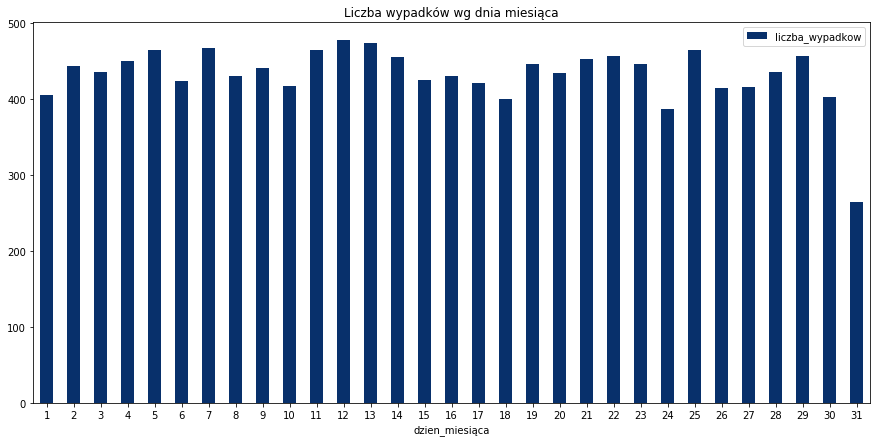

In [70]:
#zróbmy prosty wykres

import matplotlib.pyplot as plt


salary['liczba_wypadkow'].plot(kind = 'bar', figsize = (15,7),rot=360, title = 'Liczba wypadków wg dnia miesiąca', legend = True, colormap = 'Blues_r');

In [71]:
#wypadki w pierwszej połowie miesiąca - czas wypłat

(dane[dane['dzien_miesiąca']<16]
    .groupby(['dzien_miesiąca'])
    .agg({'liczba_wypadkow':'sum'})
    .sort_values(by='liczba_wypadkow', ascending=False)
)

,liczba_wypadkow
dzien_miesiąca,
12,477
13,474
7,467
5,464
11,464
14,455
4,450
2,444
9,441


In [75]:
#wypadki w pierwszej połowie miesiąca

dane[dane['dzien_miesiąca']<16]['liczba_wypadkow'].sum()

6673

In [73]:
#wypadki w drugiej połowie miesiąca

dane[dane['dzien_miesiąca']>15]['liczba_wypadkow'].sum()

6725